# Bayes ingenuo para clasificación de calidad de vinos

Se presentan dos versiones: una sin escalar y otra con escalado de variables, para comparar el impacto del preprocesamiento en el desempeño del modelo Naive Bayes.

## 1. Bayes ingenuo sin escalar

Entrenamos y evaluamos un modelo Naive Bayes usando los datos originales, sin escalar las variables predictoras.

Exactitud en test: 0.5604166666666667

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.14      0.33      0.20         3
           4       0.05      0.06      0.06        16
           5       0.66      0.64      0.65       204
           6       0.56      0.53      0.54       192
           7       0.52      0.57      0.54        60
           8       0.00      0.00      0.00         5

    accuracy                           0.56       480
   macro avg       0.32      0.36      0.33       480
weighted avg       0.57      0.56      0.57       480



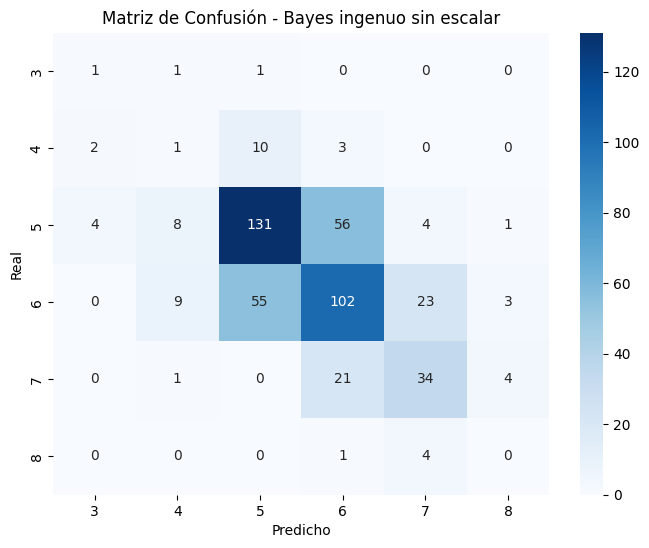

Accuracy medio CV (5 folds): 0.5284913793103448


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('winequality-red.csv', sep=';')
X = df.drop('quality', axis=1)
y = df['quality']

# División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Modelo Bayes ingenuo sin escalar
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Evaluación
print('Exactitud en test:', accuracy_score(y_test, y_pred))
print('\nReporte de clasificación:\n', classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Bayes ingenuo sin escalar')
plt.show()

# Validación cruzada
scores = cross_val_score(nb, X, y, cv=5, scoring='accuracy')
print('Accuracy medio CV (5 folds):', scores.mean())

## 2. Bayes ingenuo con escalado

Ahora estandarizamos las variables predictoras antes de entrenar el modelo Naive Bayes, para observar el impacto del preprocesamiento.

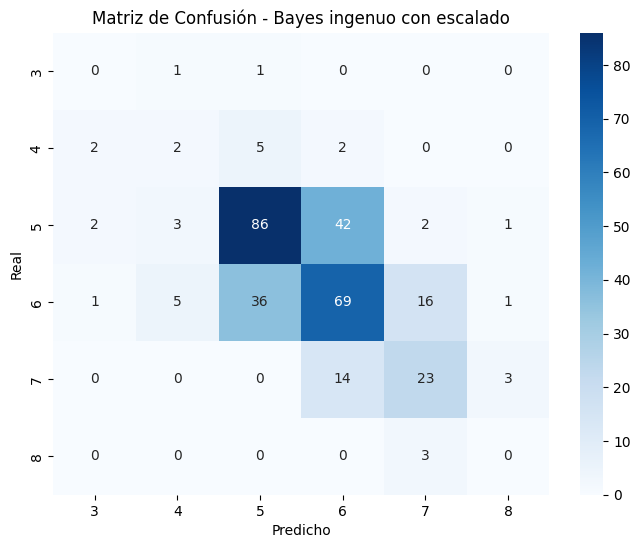

Reporte de clasificación (con escalado):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.18      0.18      0.18        11
           5       0.67      0.63      0.65       136
           6       0.54      0.54      0.54       128
           7       0.52      0.57      0.55        40
           8       0.00      0.00      0.00         3

    accuracy                           0.56       320
   macro avg       0.32      0.32      0.32       320
weighted avg       0.57      0.56      0.57       320

Accuracy promedio (CV 5-fold, con escalado): 0.522 ± 0.048


In [3]:
# Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
# CORREGIDO: usar el separador correcto
# El archivo usa punto y coma como separador

# Cargar datos
# El archivo usa punto y coma como separador
# Si da error, verificar el nombre y la ubicación del archivo

df = pd.read_csv('winequality-red.csv', sep=';')

# Variables predictoras y variable objetivo
X = df.drop('quality', axis=1)
y = df['quality']

# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalar variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Predicciones
y_pred = nb.predict(X_test_scaled)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Bayes ingenuo con escalado')
plt.show()

# Reporte de clasificación
print('Reporte de clasificación (con escalado):')
print(classification_report(y_test, y_pred))

# Cross-validation
scores = cross_val_score(nb, scaler.transform(X), y, cv=5)
print(f'Accuracy promedio (CV 5-fold, con escalado): {scores.mean():.3f} ± {scores.std():.3f}')


Accuracy en test: 0.5625

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.18      0.18      0.18        11
           5       0.67      0.63      0.65       136
           6       0.54      0.54      0.54       128
           7       0.52      0.57      0.55        40
           8       0.00      0.00      0.00         3

    accuracy                           0.56       320
   macro avg       0.32      0.32      0.32       320
weighted avg       0.57      0.56      0.57       320



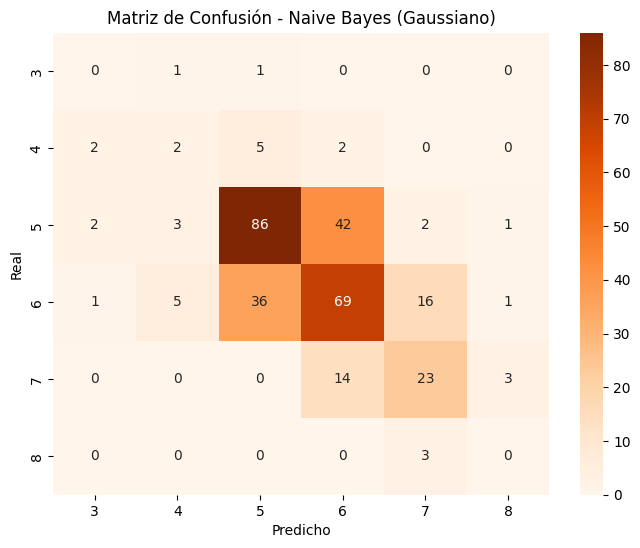

In [4]:
# --- 0) Librerías
from sklearn.naive_bayes import GaussianNB

# --- 1) Dataset ya cargado y escalado (X_train_scaled, X_test_scaled, y_train, y_test)

# --- 2) Definir modelo
nb = GaussianNB()

# --- 3) Entrenamiento
nb.fit(X_train_scaled, y_train)

# --- 4) Predicciones
y_pred_nb = nb.predict(X_test_scaled)

# --- 5) Evaluación
print("Accuracy en test:", accuracy_score(y_test, y_pred_nb))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_nb))

# --- 6) Matriz de confusión
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8,6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Oranges", 
            xticklabels=np.sort(y.unique()), 
            yticklabels=np.sort(y.unique()))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Naive Bayes (Gaussiano)")
plt.show()
